In [42]:
import random
import time


In [43]:

# Merge Sort

def mergeSort(L):
    if len(L) > 1:
        mid = len(L) // 2
        left_half = L[:mid]
        right_half = L[mid:]

        mergeSort(left_half)
        mergeSort(right_half)

        i = j = k = 0
        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                L[k] = left_half[i]
                i += 1
            else:
                L[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            L[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            L[k] = right_half[j]
            j += 1
            k += 1


In [44]:
# Insertion Sort


def insertionSort(L):
    for i in range(1, len(L)):
        key = L[i]
        j = i - 1
        while j >= 0 and key < L[j]:
            L[j + 1] = L[j]
            j -= 1
        L[j + 1] = key



In [45]:
# Bubble Sort

def bubbleSort(L):
    n = len(L)
    for i in range(n):
        for j in range(0, n - i - 1):
            if L[j] > L[j + 1]:
                L[j], L[j + 1] = L[j + 1], L[j]



In [46]:

# time() function 

def time_sort(sort_func, L):
    start = time.time()
    sort_func(L)
    end = time.time()
    return (end - start) * 1000  


# Timing tests
print("N\tMerge\tInsert\tBubble")
for n in range(100, 5100, 100):
    A = [i for i in range(n)]
    random.shuffle(A)

    # MergeSort time
    L = A.copy()
    merge_time = time_sort(mergeSort, L)

    # InsertionSort time
    L = A.copy()
    insert_time = time_sort(insertionSort, L)

    # BubbleSort time
    L = A.copy()
    bubble_time = time_sort(bubbleSort, L)

    # Results 
    print(f"{n}\t{round(merge_time, 2)}\t{
          round(insert_time, 2)}\t{round(bubble_time, 2)}")

N	Merge	Insert	Bubble
100	0.0	0.99	1.0
200	1.99	1.99	2.99
300	1.99	5.98	5.99
400	1.0	7.99	15.95
500	1.99	12.97	15.96
600	1.0	11.97	31.91
700	3.99	15.96	35.9
800	1.99	18.95	52.86
900	3.99	36.9	61.84
1000	2.0	27.92	72.8
1100	1.99	47.93	106.79
1200	1.99	49.82	137.65
1300	4.99	57.84	165.6
1400	3.99	66.86	149.61
1500	3.99	73.76	174.04
1600	4.04	85.77	191.49
1700	6.97	97.7	240.93
1800	4.94	121.71	344.08
1900	16.95	131.67	292.25
2000	4.01	153.48	350.1
2100	8.02	171.5	377.99
2200	9.97	208.44	512.86
2300	6.98	200.46	553.52
2400	8.35	216.57	506.81
2500	8.02	222.4	505.61
2600	8.98	268.28	632.15
2700	12.96	323.14	635.8
2800	9.03	340.36	751.52
2900	9.98	336.52	692.9
3000	9.94	318.2	710.14
3100	9.92	372.06	755.93
3200	12.01	410.22	812.54
3300	10.93	436.88	909.67
3400	10.31	446.85	981.69
3500	13.96	462.82	985.53
3600	9.97	524.6	1098.06
3700	10.01	573.43	1159.98
3800	12.0	548.55	1187.9
3900	15.26	580.55	1385.45
4000	12.97	639.3	1362.36
4100	13.35	650.66	1437.53
4200	13.96	676.19	1528.91
4300	14.91	720

OPTIONAL

In [47]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

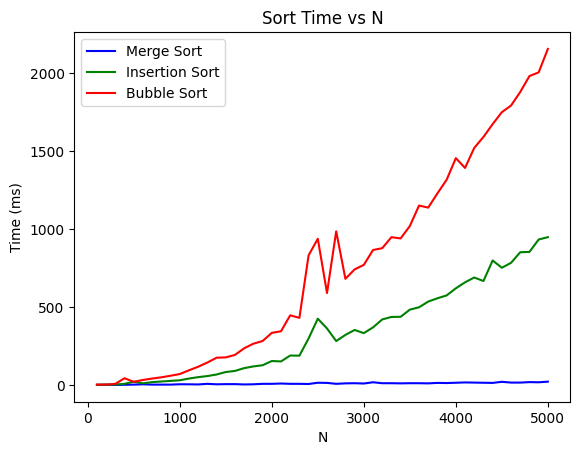

In [48]:
# Data
n_values = list(range(100, 5100, 100))
merge_times = []
insert_times = []
bubble_times = []

for n in n_values:
    A = [i for i in range(n)]
    random.shuffle(A)

    L = A.copy()
    merge_times.append(time_sort(mergeSort, L))

    L = A.copy()
    insert_times.append(time_sort(insertionSort, L))

    L = A.copy()
    bubble_times.append(time_sort(bubbleSort, L))


# Plot
plt.plot(n_values, merge_times, label='Merge Sort', color='blue')
plt.plot(n_values, insert_times, label='Insertion Sort', color='green')
plt.plot(n_values, bubble_times, label='Bubble Sort', color='red')
plt.xlabel('N')
plt.ylabel('Time (ms)')
plt.legend()
plt.title('Sort Time vs N')
plt.show()

In [49]:
# Curve fitting function for merge sort (n log n)
def merge_sort_fit(n, a, b):
    return a * n * np.log(n) + b

# Curve fitting function for quadratic (n^2) complexity for insertion and bubble sort

def quadratic_fit(n, a, b):
    return a * n**2 + b

# Convert n values to numpy arrays for fitting
n_values_np = np.array(n_values)

# Perform curve fitting for merge sort
params_merge, _ = curve_fit(merge_sort_fit, n_values_np, merge_times)

# Perform curve fitting for insertion sort
params_insert, _ = curve_fit(quadratic_fit, n_values_np, insert_times)

# Perform curve fitting for bubble sort
params_bubble, _ = curve_fit(quadratic_fit, n_values_np, bubble_times)

# Extract parameters
a_merge, b_merge = params_merge
a_insert, b_insert = params_insert
a_bubble, b_bubble = params_bubble

# Results
print(f"Merge Sort fit: a = {a_merge}, b = {b_merge}")
print(f"Insertion Sort fit: a = {a_insert}, b = {b_insert}")
print(f"Bubble Sort fit: a = {a_bubble}, b = {b_bubble}")

Merge Sort fit: a = 0.00040998038154565244, b = 0.47464434551030155
Insertion Sort fit: a = 3.806763068164137e-05, b = 8.857233652675765
Bubble Sort fit: a = 8.495396281052763e-05, b = 25.74054043428458


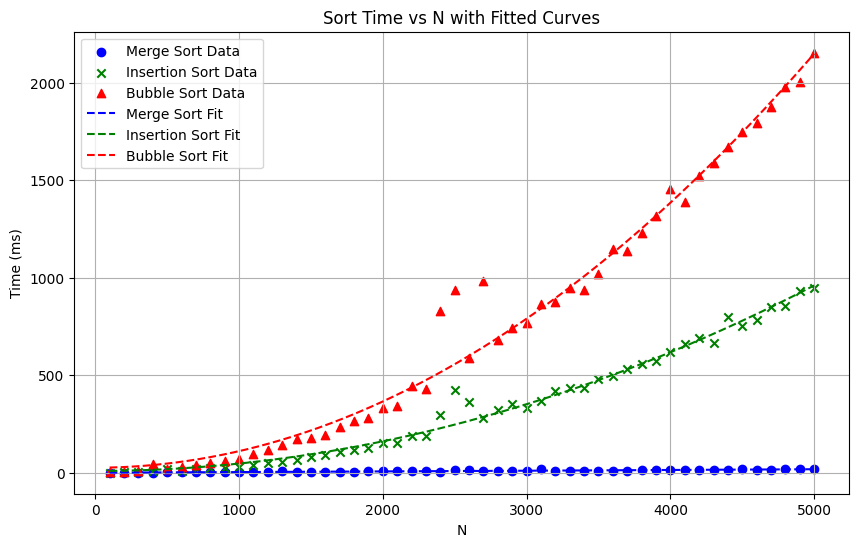

In [50]:
# Visualization of the data and fit
plt.figure(figsize=(10, 6))

# Plot (data points)
plt.scatter(n_values, merge_times, label='Merge Sort Data', color='blue', marker='o')
plt.scatter(n_values, insert_times, label='Insertion Sort Data', color='green', marker='x')
plt.scatter(n_values, bubble_times, label='Bubble Sort Data', color='red', marker='^')

# Plot (fitted curves)
n_fit = np.linspace(100, 5000, 500)
plt.plot(n_fit, merge_sort_fit(n_fit, a_merge, b_merge), label='Merge Sort Fit', color='blue', linestyle='--')
plt.plot(n_fit, quadratic_fit(n_fit, a_insert, b_insert), label='Insertion Sort Fit', color='green', linestyle='--')
plt.plot(n_fit, quadratic_fit(n_fit, a_bubble, b_bubble), label='Bubble Sort Fit', color='red', linestyle='--')

# Title and Labels
plt.xlabel('N')
plt.ylabel('Time (ms)')
plt.title('Sort Time vs N with Fitted Curves')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
# Test using n= 1,000,000
n_large = 1000000

# Estimate merge sort time for n=1,000,000
merge_time_large = merge_sort_fit(n_large, a_merge, b_merge)

# Estimate insertion sort time for n=1,000,000
insert_time_large = quadratic_fit(n_large, a_insert, b_insert)

# Estimate bubble sort time for n=1,000,000
bubble_time_large = quadratic_fit(n_large, a_bubble, b_bubble)

print(f"Estimated time for n = 1,000,000:")
print(f"Merge Sort: {merge_time_large:.2f} ms")
print(f"Insertion Sort: {insert_time_large:.2f} ms")
print(f"Bubble Sort: {bubble_time_large:.2f} ms")

Estimated time for n = 1,000,000:
Merge Sort: 5664.56 ms
Insertion Sort: 38067639.54 ms
Bubble Sort: 84953988.55 ms


As observed from the sort times, merge sort performance is significantly better than insertion sort and bubble sort due to its O(nlogn) complexity.